In [2]:
# Choose a user:
USER = 'Danny'

# Check input user...
USER_LIST = ['Eole', 'Danny', 'Cindy']
assert (USER in USER_LIST), \
"`USER` value is invalid: {user_val} \nChoose value in: {user_list}".format(user_val = USER, user_list = USER_LIST)

# Define file path
save_load_path = None

if USER == 'Eole':
    save_load_path = '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
elif USER == 'Danny':
    save_load_path = '/Users/Dannyhsiao/Dropbox/MA755 Public (1)/pynotes/Danny-Eole-Yuchen/Pickles'
elif USER == 'Cindy':
    save_load_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
        
# PATHS...
# '/Users/Dannyhsiao/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
# '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
# '/Users/YuchenZhou/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'

In [3]:
import pickle
import pandas as pd
import numpy as np

In [4]:
# Choose data source here:
DATA = 'song'

DATA_LIST = ['lyrics', 'song', 'hybrid']
input_file = None

assert (DATA in DATA_LIST), \
"`DATA` value is invalid: {data_val} \nChoose value in: {data_list}".format(data_val = DATA, data_list = DATA_LIST)

if DATA == 'lyrics':
    input_file = 'mss_lyrics_pvt_df.pkl'
elif DATA == 'song':
    input_file = 'mss_song_df.pkl' # Confirm input file name /!\
elif DATA == 'hybrid':
    input_file = 'mss_hybrid_df.pkl' # Confirm input file name /!\
else:
    exception

In [5]:
mss_df = pd.read_pickle(save_load_path+'/mss_df.pkl')
mss_df.head()
mss_df.shape

(10000, 117)

In [6]:
mss_df_d=mss_df.drop(['artist_id','artist_latitude','artist_location','artist_longitude','artist_name','song_id',
                      'track','track_id','title','release'], axis=1)

In [7]:
# Normalization before PCA
mss_df_dnorm = (mss_df_d - mss_df_d.mean()) / (mss_df_d.max() - mss_df_d.min())

In [8]:
# replace Nan with column mean
mss_df_dnorm=mss_df_dnorm.fillna(mss_df_dnorm.mean())

In [ ]:
col_list = list(mss_df_d.columns.values)
col_list = pd.DataFrame(col_list)
col_list

In [9]:
import os
import itertools as it
import matplotlib.pyplot as plt
import math
import h5py 
import os
import itertools
import re
from sklearn.preprocessing import scale
%matplotlib inline

In [10]:
def pcf(matrix):
    #scale the data
    A_s = scale(matrix, with_mean=True,with_std=True,axis=0)
    #covariance matrix
    A_c = np.cov(A_s.T)
    #Get the eign values and eign vectors
    eig_val_cov, eig_vec_cov = np.linalg.eig(A_c)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i])
             for i in range(len(eig_val_cov))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort
    eig_pairs.reverse
    return(eig_pairs)

In [11]:
pc = pcf(mss_df_dnorm)

print(pc[0])

(9.5849585346123423, array([-0.01504707, -0.00357943,  0.0032252 , -0.00415203, -0.00846373,
       -0.00863221, -0.00932518, -0.00784089, -0.00901503, -0.00432076,
       -0.00815557, -0.00139518, -0.00676733, -0.01239083,  0.0116341 ,
       -0.01143172,  0.20544624,  0.22324857,  0.22734145,  0.19842967,
        0.01041488,  0.01091817,  0.01678129,  0.02425782,  0.01860275,
        0.02101832,  0.01980328,  0.01973561,  0.23383708,  0.01505323,
        0.01719511,  0.01810612,  0.00992275,  0.00128128,  0.00538937,
        0.00915526,  0.01245078,  0.0135489 ,  0.01579879,  0.25348228,
        0.01123205,  0.00495871,  0.00912148,  0.01369163,  0.00938196,
        0.00098549,  0.23994876,  0.25002373,  0.24807637,  0.22175988,
        0.2407703 ,  0.23395164, -0.20559974,  0.20801534, -0.10484999,
       -0.05085324, -0.07287836,  0.0390527 ,  0.02407455, -0.09300634,
        0.06645362,  0.13880295,  0.09711152, -0.02360598, -0.05971769,
       -0.08463737,  0.17569475,  0.0665466

In [12]:
def extract_eign(pair):
    eig_val=[0]*len(pair)
    index=0
    for i in pair:
        eig_val[index]=i[0]
        index+=1
    return(eig_val)

pceign=extract_eign(pc)

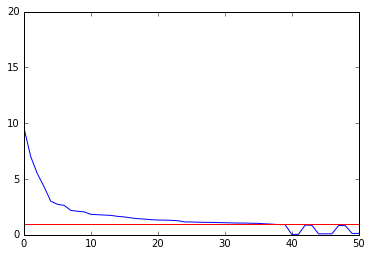

In [13]:
plt.plot(pceign)
plt.axis([0,50,0,20])
plt.axhline(y=1,color='r')

In [20]:
def var_explained(eig,i):
    cum_per=0
    per_var=0
    for e_val in (eig[0:i]):
        per_var = round((e_val / len(eig)),3)
        cum_per+=per_var
    return(cum_per)

var_explained(pceign,36)

0.70700000000000041

In [21]:
num_pc = 55

len_vector = mss_df_dnorm.shape[1]

w_matrix = np.empty([len_vector,1], dtype = float)

In [22]:
for i in range(num_pc):
    pc_col = pc[i][1].reshape(len_vector,1)
    w_matrix = np.hstack((w_matrix, pc_col))
    
w_matrix2 = np.delete(w_matrix,0,1).astype(float)

In [23]:
print(w_matrix2.shape)
print('****************************************************')
print(w_matrix2)

(107, 55)
****************************************************
[[ -1.50470657e-02  -7.64511262e-02   6.11695706e-03 ...,  -1.33920809e-03
    7.56493404e-02  -1.21604679e-01]
 [ -3.57943403e-03  -6.22578082e-02   6.64328123e-03 ...,  -3.44905304e-04
   -7.18117332e-02  -1.51020102e-01]
 [  3.22520492e-03   1.15572112e-01  -2.89167405e-01 ...,   5.58376288e-04
    6.65375002e-04   6.70367135e-02]
 ..., 
 [ -2.20497426e-03  -7.35412757e-02   1.50775534e-01 ...,  -2.76666372e-04
    1.91447756e-03  -1.00987139e-02]
 [ -3.23897224e-03  -2.48220233e-02   3.91015700e-02 ...,   1.58178815e-03
    1.16196690e-03  -3.84043654e-02]
 [  1.00379899e-03  -2.90996194e-03   4.59979218e-02 ...,  -2.45447912e-03
   -5.60459339e-04   2.83154179e-02]]


In [24]:
pc_scores = mss_df_dnorm.dot(w_matrix2)
pc_scores.shape

(10000, 55)

In [25]:
# Checkpoint - pickle pickle pickle!
np.save(save_load_path+'/pc_scores_acoustic', pc_scores)